## LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## 0. IMPORTACION DATOS

In [2]:
df_train = pd.read_csv("../data/train.csv", index_col = 0)
df_test = pd.read_csv("../data/test.csv", index_col = 0)

## 1. ANALYSIS

1. Types (category or numerical)
2. Descriptive statistics
3. Shape
4. Correlation
5. Null values

In [3]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [4]:
df_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [25]:
df_test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13485 entries, 0 to 13484
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         13485 non-null  float64
 1   cut           13485 non-null  int64  
 2   depth         13485 non-null  float64
 3   table         13485 non-null  float64
 4   x             13485 non-null  float64
 5   y             13485 non-null  float64
 6   z             13485 non-null  float64
 7   color_E       13485 non-null  uint8  
 8   color_F       13485 non-null  uint8  
 9   color_G       13485 non-null  uint8  
 10  color_H       13485 non-null  uint8  
 11  color_I       13485 non-null  uint8  
 12  color_J       13485 non-null  uint8  
 13  clarity_IF    13485 non-null  uint8  
 14  clarity_SI1   13485 non-null  uint8  
 15  clarity_SI2   13485 non-null  uint8  
 16  clarity_VS1   13485 non-null  uint8  
 17  clarity_VS2   13485 non-null  uint8  
 18  clarity_VVS1  13485 non-nu

In [6]:
df_train.shape

(40455, 10)

In [7]:
df_train.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
depth,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774
price,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000


<AxesSubplot:>

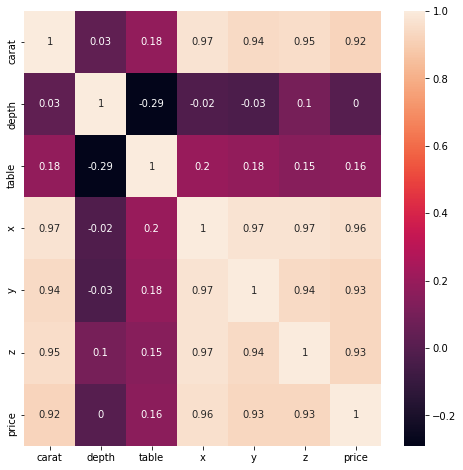

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr().round(2), annot = True)

In [9]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## 2. DATA CLEANSING AND DATA PROCESSING

### OUTLIERS

In [10]:
X_train = df_train[df_train.columns[:-1]]
y_train = df_train.price

<AxesSubplot:>

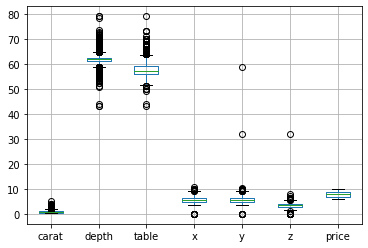

In [11]:
df_train.boxplot()

In [12]:
iso = IsolationForest(contamination=0.1)
df_train['c_outliers'] = iso.fit_predict(df_train['carat'].to_frame())
df_train['depth_outliers'] = iso.fit_predict(df_train['depth'].to_frame())
df_train['table_outliers'] = iso.fit_predict(df_train['table'].to_frame())
df_train['x_outliers'] = iso.fit_predict(df_train['x'].to_frame())
df_train['y_outliers'] = iso.fit_predict(df_train['y'].to_frame())
df_train['z_outliers'] = iso.fit_predict(df_train['z'].to_frame())
df_train['sum_outliers'] = df_train['c_outliers'] + df_train['depth_outliers'] + df_train['table_outliers'] + \
                            df_train['x_outliers'] + df_train['y_outliers'] + df_train['z_outliers']
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,c_outliers,depth_outliers,table_outliers,x_outliers,y_outliers,z_outliers,sum_outliers
id,,,,,,,,,,,,,,,,,
0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754,1,1,1,1,1,1,6
1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492,1,-1,1,1,1,1,4
2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010,-1,1,1,-1,-1,1,0
3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227,1,1,1,1,-1,1,4
4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314,1,1,1,1,1,1,6


In [13]:
df_train.shape

(40455, 17)

In [14]:
p_c_out = df_train.c_outliers[df_train['c_outliers']<0].sum()*-100 / df_train.shape[0]
p_d_out = df_train.depth_outliers[df_train['depth_outliers']<0].sum()*-100/ df_train.shape[0]
p_t_out = df_train.table_outliers[df_train['table_outliers']<0].sum()*-100/ df_train.shape[0]
p_x_out = df_train.x_outliers[df_train['x_outliers']<0].sum()*-100/ df_train.shape[0]
p_y_out = df_train.y_outliers[df_train['y_outliers']<0].sum()*-100/ df_train.shape[0]
p_z_out = df_train.z_outliers[df_train['z_outliers']<0].sum()*-100/ df_train.shape[0]
p_sum_out = df_train.sum_outliers[df_train['sum_outliers']<0].count()*100/ df_train.shape[0]


p_c_out, p_d_out, p_t_out, p_x_out, p_y_out, p_z_out, p_sum_out

(9.96662958843159,
 9.75404770732913,
 6.407119021134594,
 9.904832529971573,
 9.951798294401186,
 9.885057471264368,
 8.154739834383884)

In [15]:
# Deleting those rows with more than 3 outliers in their cuantitative features:

df_train.drop(df_train[df_train.sum_outliers < 0].index, inplace=True)
df_train.shape

(37156, 17)

In [16]:
df_train = df_train.drop(['c_outliers', 'depth_outliers', 'table_outliers', 'x_outliers', 'y_outliers', 'z_outliers', 'sum_outliers'], axis=1)
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [17]:
df_train.shape

(37156, 10)

In [18]:
df_train.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

## 3. FEATURE ENGINEERING

### By hand with a dictionary

In [19]:
dic_para_hot = { "Fair": 1,
                "Good": 2,
                "Very Good": 3,
                "Premium":4,
                "Ideal":5,
}

In [20]:
# With a map we replace all the strings in the cut columns by the value assigned in the dictionary.
df_train.cut = df_train.cut.map(dic_para_hot)
df_test.cut = df_test.cut.map(dic_para_hot)

### Get dummies

In [21]:
df_train = pd.get_dummies(df_train, columns=["color", "clarity"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["color", "clarity"], drop_first=True)

In [22]:
df_train.head()

,carat,cut,depth,table,x,y,z,price,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,1.01,4,62.7,58.0,6.36,6.31,3.97,8.754,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.60,2,64.3,57.0,5.31,5.38,3.43,7.492,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.60,4,59.4,59.0,7.55,7.60,4.50,9.010,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.30,3,63.5,58.0,4.27,4.24,2.70,6.227,0,0,...,0,0,1,0,0,0,1,0,0,0
4,1.00,3,62.8,57.0,6.37,6.44,4.02,8.314,0,1,...,0,0,0,0,0,1,0,0,0,0


In [23]:
df_test.head()

,carat,cut,depth,table,x,y,z,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,
0,2.01,5,61.9,57.0,8.14,8.05,5.01,0,0,0,1,0,0,0,1,0,0,0,0,0
1,0.49,2,57.5,60.0,5.18,5.25,3.00,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.03,4,58.6,62.0,6.65,6.60,3.88,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.90,3,63.0,56.0,6.11,6.15,3.86,1,0,0,0,0,0,0,1,0,0,0,0,0
4,0.59,5,62.5,55.0,5.35,5.40,3.36,0,0,0,0,0,0,0,1,0,0,0,0,0


## 4. SAVING DATA

In [24]:
df_train.to_csv("../data/df_train.csv")
df_test.to_csv("../data/df_test.csv")